In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import datetime as dt

In [43]:
import seaborn as sns

In [58]:
import scipy.stats as stats

In [63]:
from scipy.stats import norm

In [167]:
df_calories= pd.read_csv('dailyCalories_merged.csv')

In [170]:
df_calories['date']= pd.to_datetime(df_calories['ActivityDay'])

In [546]:
df_heart= pd.read_csv('heartrate_seconds_merged.csv')

In [193]:
df.shape

(940, 19)

In [194]:
df_sleep.shape

(413, 9)

In [4]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [8]:
df.shape

(940, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [133]:
df.skew()

Id                          0.177125
TotalSteps                  0.652895
TotalDistance               1.126274
TrackerDistance             1.134550
LoggedActivitiesDistance    6.297440
VeryActiveDistance          2.996170
ModeratelyActiveDistance    2.771194
LightActiveDistance         0.182247
SedentaryActiveDistance     8.589899
VeryActiveMinutes           2.176143
FairlyActiveMinutes         2.479492
LightlyActiveMinutes       -0.037929
SedentaryMinutes           -0.294498
Calories                    0.422450
month                       0.629977
day                        -0.044603
weekday                     0.094678
dtype: float64

In [9]:
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


# OUTLIERS

In [845]:
df.loc[df['Calories']<1000].count()[1]/df.shape[0]

0.01276595744680851

In [844]:
df.loc[df['Calories']>2600].count()[1]/df.shape[0]

0.33297872340425533

In [842]:
df.loc[df['TotalSteps']>9500].count()[1]/df.shape[0]

0.35425531914893615

In [840]:
df.loc[df['TotalSteps']<3500].count()[1]/df.shape[0]

0.22872340425531915

In [850]:
df_sleep[df_sleep['TotalMinutesAsleep']<360].count()[1]/df_sleep.shape[0]

0.24213075060532688

In [851]:
df_sleep[df_sleep['TotalMinutesAsleep']>490].count()[1]/df_sleep.shape[0]

0.24939467312348668

In [846]:
df_sleep.describe()

,index,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day,weekday,month,TotalMinutesAsleep1
count,413.000000,4.130000e+02,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,412.000000
mean,206.000000,5.000979e+09,1.118644,419.467312,458.639225,15.777240,3.002421,4.358354,419.419903
std,119.367081,2.060360e+09,0.345521,118.344679,127.101607,8.704634,1.928955,0.480098,118.484637
min,0.000000,1.503960e+09,1.000000,58.000000,61.000000,1.000000,0.000000,4.000000,58.000000
25%,103.000000,3.977334e+09,1.000000,361.000000,403.000000,8.000000,1.000000,4.000000,361.000000
50%,206.000000,4.702922e+09,1.000000,433.000000,463.000000,16.000000,3.000000,4.000000,432.500000
75%,309.000000,6.962181e+09,1.000000,490.000000,526.000000,23.000000,5.000000,5.000000,490.500000
max,412.000000,8.792010e+09,3.000000,796.000000,961.000000,30.000000,6.000000,5.000000,796.000000


In [730]:
df_sleep['TotalMinutesAsleep1'] = df_sleep['TotalMinutesAsleep'].shift(periods=1)

In [718]:
df_sleep["ActivityDate2"] = [df_sleep["ActivityDate"][i].split(" ")[0] for i in range(df_sleep.shape[0])]

In [654]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    object        
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

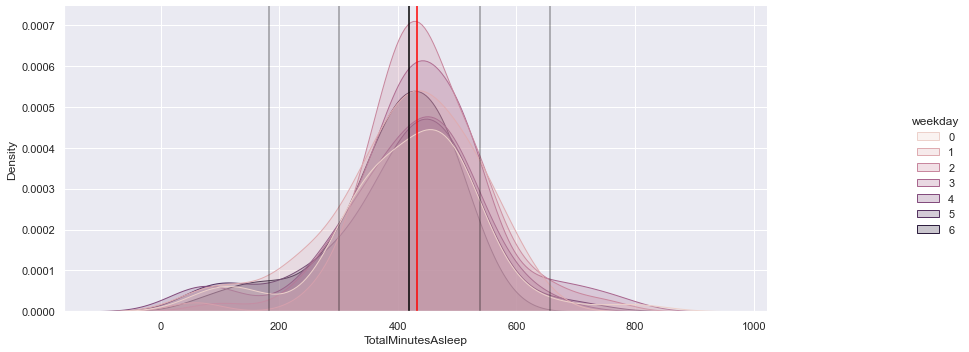

In [506]:
g =sns.displot(df_all, x= df_all.TotalMinutesAsleep, hue="weekday", kind="kde" ,fill=True)
g.fig.set_figwidth(15)
g.fig.set_figheight(5)


distribution=df_all.TotalMinutesAsleep
plt.axvline(x=distribution.mean(), color='black', linestyle='-' ,alpha=1)
plt.axvline(x=distribution.median(), color='red', linestyle='-' ,alpha=1)
plt.axvline(x= distribution.mean()- distribution.std() , color='black', linestyle='-',alpha=.35)
plt.axvline(x=distribution.mean()+ distribution.std(), color='black', linestyle='-',alpha=.35)
plt.axvline(x=distribution.mean()- distribution.std()*2, color='black', linestyle='-',alpha=.35)
plt.axvline(x=distribution.mean()+ distribution.std()*2, color='black', linestyle='-',alpha=.35)

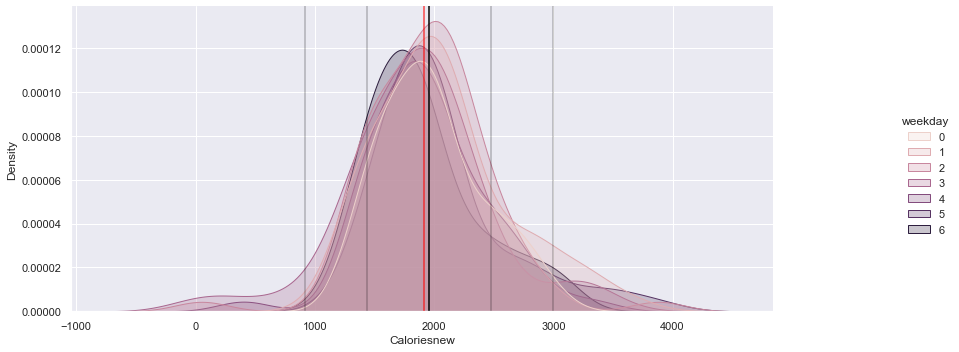

In [512]:
g =sns.displot(df_all, x= df_all.Caloriesnew, hue="weekday", kind="kde" , fill=True )
g.fig.set_figwidth(15)
g.fig.set_figheight(5)

distribution=df_all.Caloriesnew
plt.axvline(x=distribution.mean(), color='black', linestyle='-' ,alpha=1)
plt.axvline(x=distribution.median(), color='red', linestyle='-' ,alpha=.7)
plt.axvline(x= distribution.mean()- distribution.std() , color='black', linestyle='-',alpha=.25)
plt.axvline(x=distribution.mean()+ distribution.std(), color='black', linestyle='-',alpha=.25)
plt.axvline(x=distribution.mean()- distribution.std()*2, color='black', linestyle='-',alpha=.25)
plt.axvline(x=distribution.mean()+ distribution.std()*2, color='black', linestyle='-',alpha=.25)

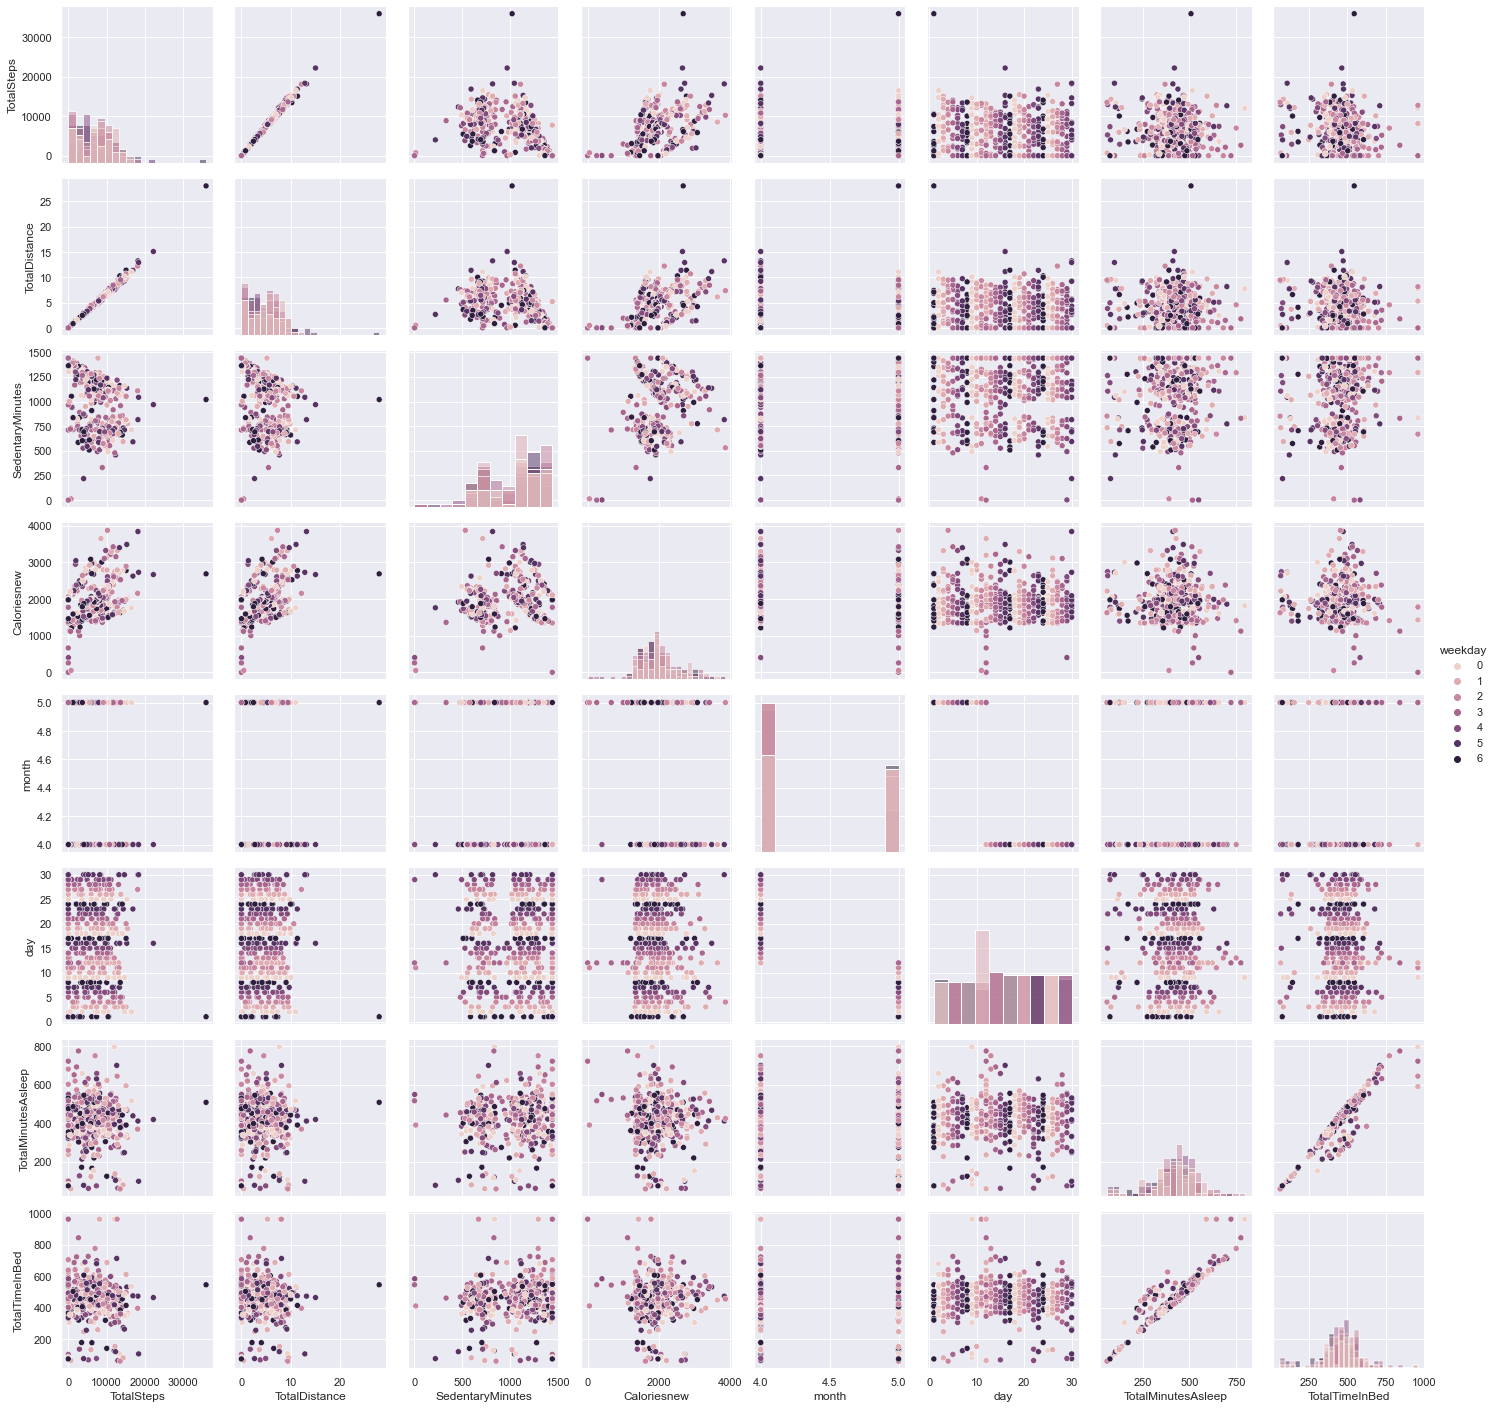

In [364]:
g = sns.PairGrid(df_all, hue="weekday")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

/Users/user/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalMinutesAsleep', ylabel='Density'>

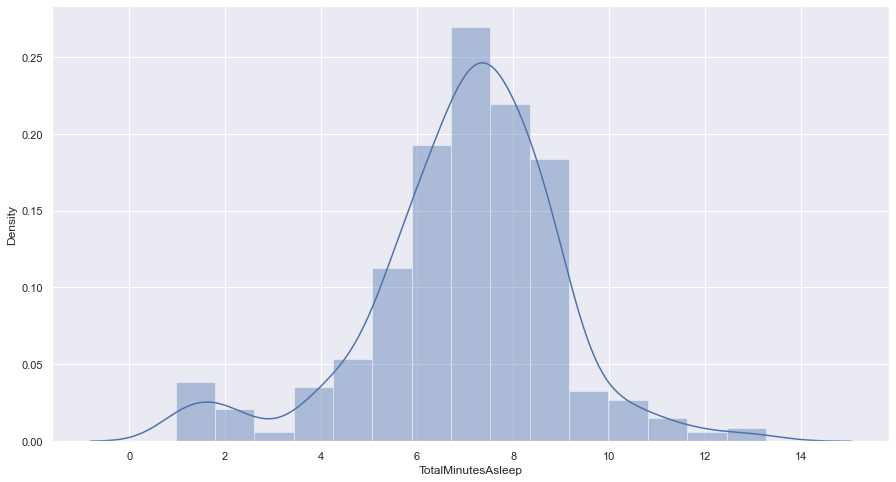

In [372]:
sns.distplot(df_all.TotalMinutesAsleep/60, kde=True,  bins=15,)

In [409]:
fig.set_size_inches(12, 8)

In [438]:
df_all.TotalDistance.describe()

count    412.000000
mean       4.507597
std        3.276930
min        0.000000
25%        1.930000
50%        4.450000
75%        6.717500
max       28.030001
Name: TotalDistance, dtype: float64

In [450]:
df_all.quantile([.05, .25, .5, .75,.95], axis = 0)

,TotalSteps,TotalDistance,SedentaryMinutes,Caloriesnew,month,day,weekday,TotalMinutesAsleep,TotalTimeInBed
0.05,0.00,0.0000,571.75,1347.00,4.0,2.0,0.0,168.75,216.95
0.25,2963.00,1.9300,754.00,1616.00,4.0,9.0,1.0,361.00,402.75
0.50,6640.00,4.4500,1105.00,1913.00,4.0,16.0,3.0,432.50,463.50
0.75,10065.00,6.7175,1277.00,2195.75,5.0,23.0,5.0,490.50,526.25
0.95,13896.75,9.4625,1440.00,2937.25,5.0,29.0,6.0,590.45,629.60


Text(0.5, 1.0, 'TOTAL DISTANCE in miles per day and Mean = 4.50759707459529 Standard Deviation of  = 3.2769295751419363')

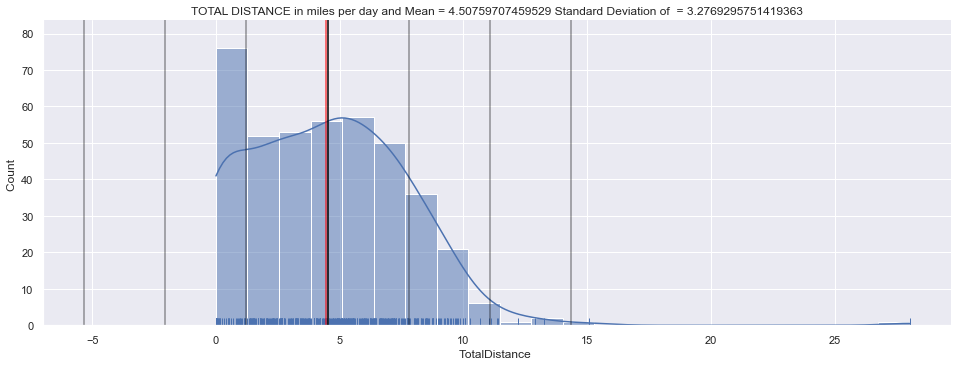

In [552]:
g =sns.displot(df_all, x= df_all.TotalDistance , fill=True , rug=True ,kde=True ,stat='count',palette="crest")
g.fig.set_figwidth(15)
g.fig.set_figheight(5)

distribution=df_all.TotalDistance
plt.axvline(x=distribution.mean(), color='black', linestyle='-' ,alpha=1)
plt.axvline(x=distribution.median(), color='red', linestyle='-' ,alpha=.7)
plt.axvline(x= distribution.mean()- distribution.std() , color='black', linestyle='-',alpha=.4)
plt.axvline(x=distribution.mean()+ distribution.std(), color='black', linestyle='-',alpha=.4)
plt.axvline(x=distribution.mean()- distribution.std()*2, color='black', linestyle='-',alpha=.4)
plt.axvline(x=distribution.mean()+ distribution.std()*2, color='black', linestyle='-',alpha=.4)
plt.axvline(x=distribution.mean()- distribution.std()*3, color='black', linestyle='-',alpha=.4)
plt.axvline(x=distribution.mean()+ distribution.std()*3, color='black', linestyle='-',alpha=.4)
g.set(xlabel='TotalDistance ', ylabel='Count ', )
plt.title("TOTAL DISTANCE in miles per day and Mean = " +str(distribution.mean()) +" Standard Deviation of  = " +str(distribution.std()))

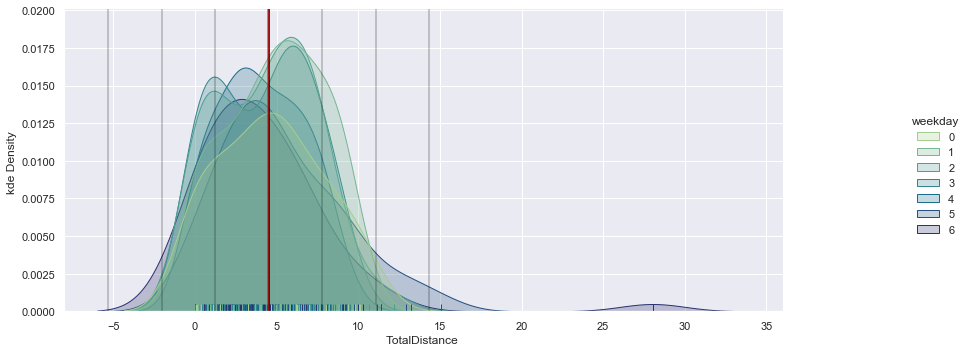

In [536]:
g =sns.displot(df_all, x= df_all.TotalDistance, hue="weekday", kind="kde" , fill=True , rug=True,palette="crest" )
g.fig.set_figwidth(15)
g.fig.set_figheight(5)

distribution=df_all.TotalDistance
plt.axvline(x=distribution.mean(), color='black', linestyle='-' ,alpha=1)
plt.axvline(x=distribution.median(), color='red', linestyle='-' ,alpha=.7)
plt.axvline(x= distribution.mean()- distribution.std() , color='black', linestyle='-',alpha=.25)
plt.axvline(x=distribution.mean()+ distribution.std(), color='black', linestyle='-',alpha=.25)
plt.axvline(x=distribution.mean()- distribution.std()*2, color='black', linestyle='-',alpha=.25)
plt.axvline(x=distribution.mean()+ distribution.std()*2, color='black', linestyle='-',alpha=.25)
plt.axvline(x=distribution.mean()- distribution.std()*3, color='black', linestyle='-',alpha=.25)
plt.axvline(x=distribution.mean()+ distribution.std()*3, color='black', linestyle='-',alpha=.25)
g.set(xlabel='TotalDistance ', ylabel='kde Density ')

In [280]:
df_all=df_all.drop(columns=["Id","ActivityDate",'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes','ActivityDay', 'Calories', 'date','Date','TrackerDistance'])

<AxesSubplot:>

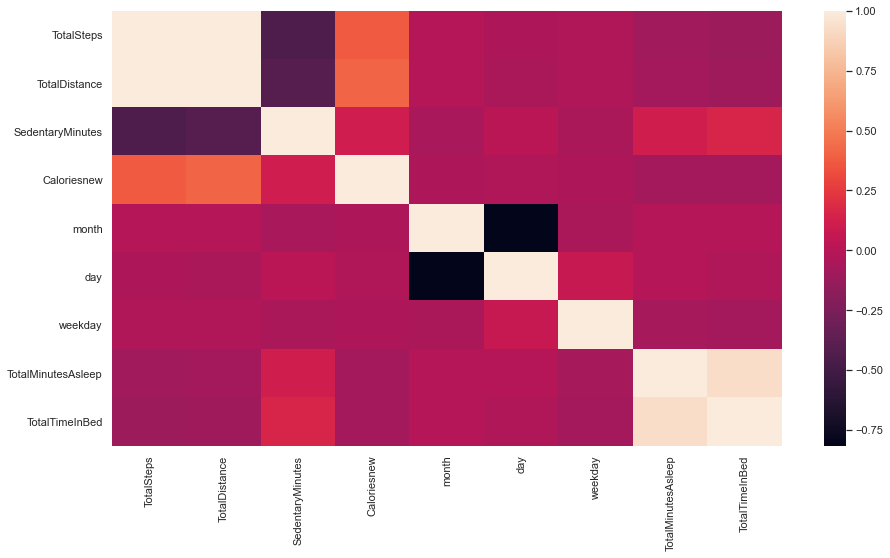

In [283]:
sns.heatmap(df_all.corr())

# OUTLIERS

<AxesSubplot:xlabel='weekday', ylabel='TotalTimeInBed'>

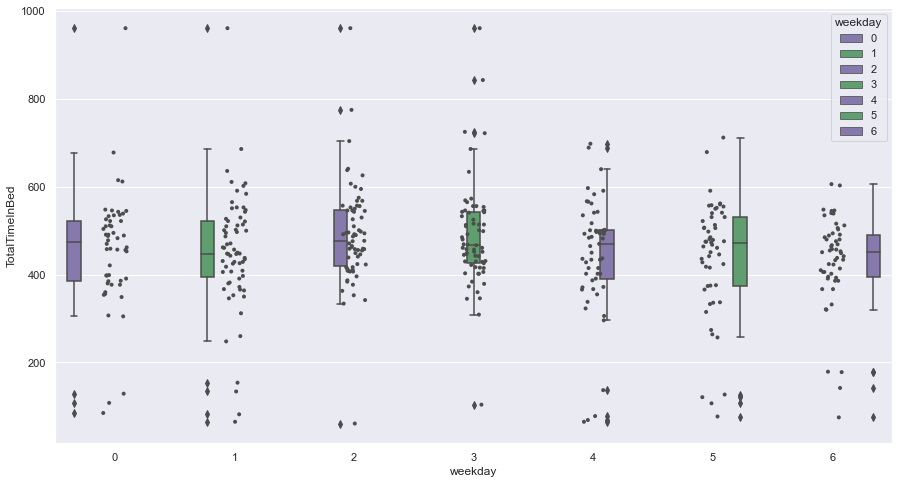

In [358]:

sns.boxplot(x="weekday", y="TotalTimeInBed",
            hue="weekday", palette=["m", "g"],
            data=df_all)
sns.stripplot(x="weekday", y="TotalTimeInBed", data=df_all,
              size=4, color=".3", linewidth=0)

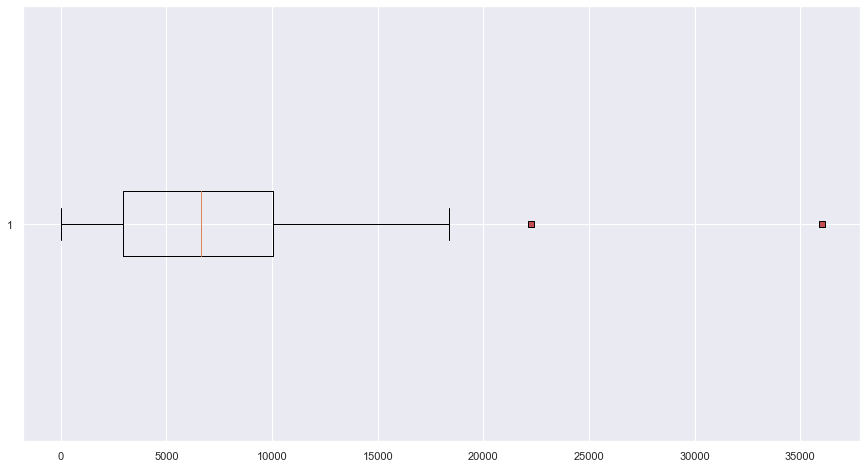

In [856]:
red_square = dict(markerfacecolor='r', marker='s')
plt.boxplot(df_all['TotalSteps'], vert=False, flierprops=red_square)
plt.show()

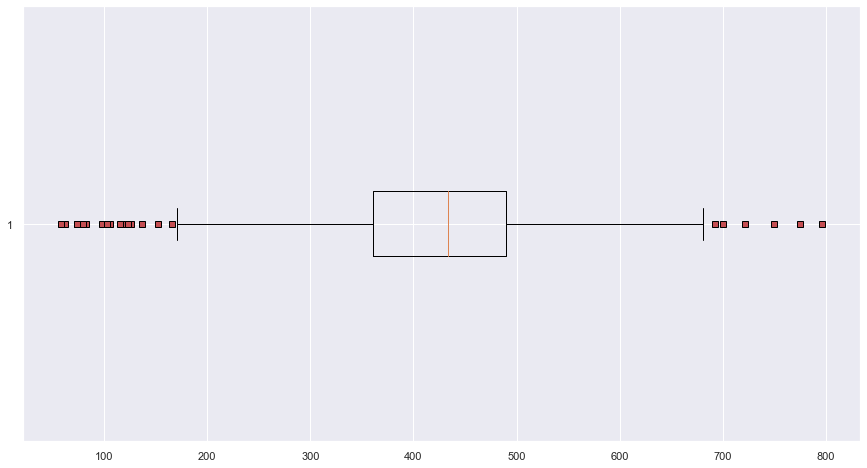

In [855]:
red_square = dict(markerfacecolor='r', marker='s')
plt.boxplot(df_sleep['TotalMinutesAsleep'], vert=False, flierprops=red_square)
plt.show()

<AxesSubplot:xlabel='weekday', ylabel='TotalMinutesAsleep'>

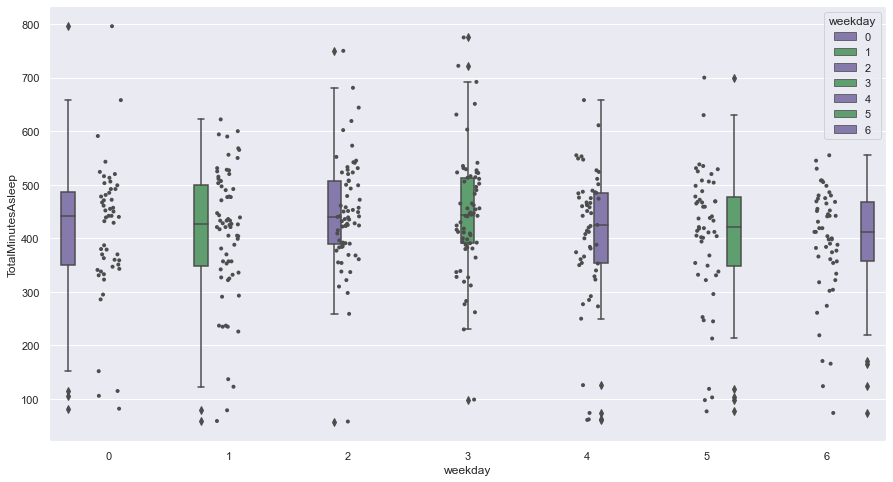

In [348]:

sns.boxplot(x="weekday", y="TotalMinutesAsleep",
            hue="weekday", palette=["m", "g"],
            data=df_all)
sns.stripplot(x="weekday", y="TotalMinutesAsleep", data=df_all,
              size=4, color=".3", linewidth=0)

<AxesSubplot:xlabel='weekday', ylabel='TotalSteps'>

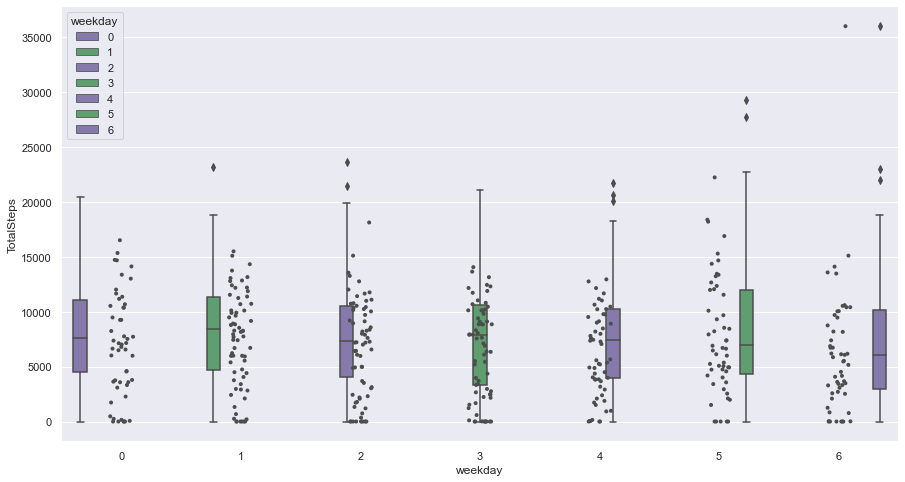

In [349]:
sns.boxplot(x="weekday", y="TotalSteps",
            hue="weekday", palette=["m", "g"],
            data=df)
sns.stripplot(x="weekday", y="TotalSteps", data=df_all,
              size=4, color=".3", linewidth=0)

<AxesSubplot:xlabel='weekday', ylabel='Caloriesnew'>

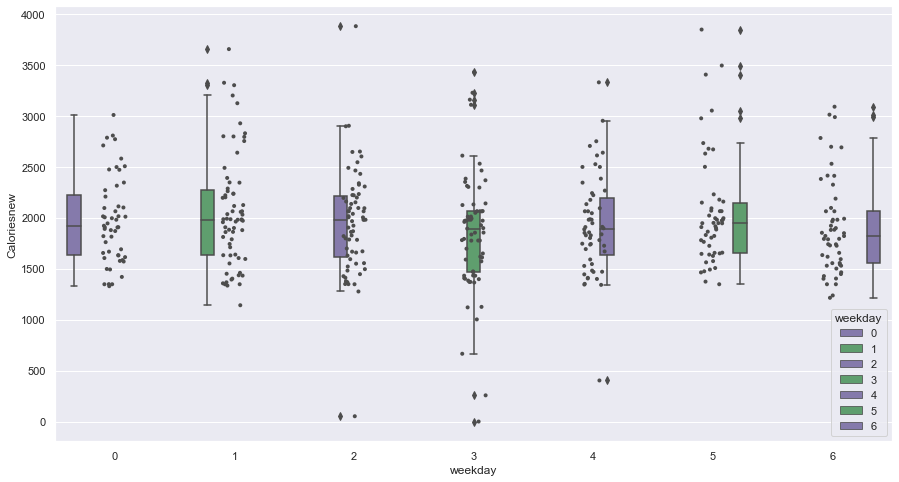

In [350]:
sns.boxplot(x="weekday", y="Caloriesnew",
            hue="weekday", palette=["m", "g"],
            data=df_all)
sns.stripplot(x="weekday", y="Caloriesnew", data=df_all,
              size=4, color=".3", linewidth=0)

In [780]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'Date', 'month',
       'day', 'weekday'],
      dtype='object')

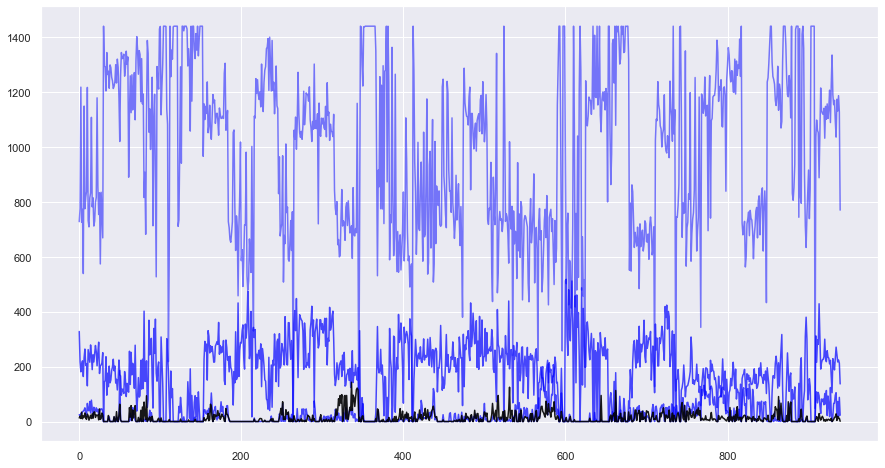

In [801]:
plt.plot(df['SedentaryMinutes'],  alpha=0.5, color="blue")
plt.plot(df['LightlyActiveMinutes'],  alpha=0.7, color="blue")
plt.plot(df['VeryActiveMinutes'],  alpha=0.7, color="blue")
plt.plot(df['FairlyActiveMinutes'],  alpha=0.9, color="black")


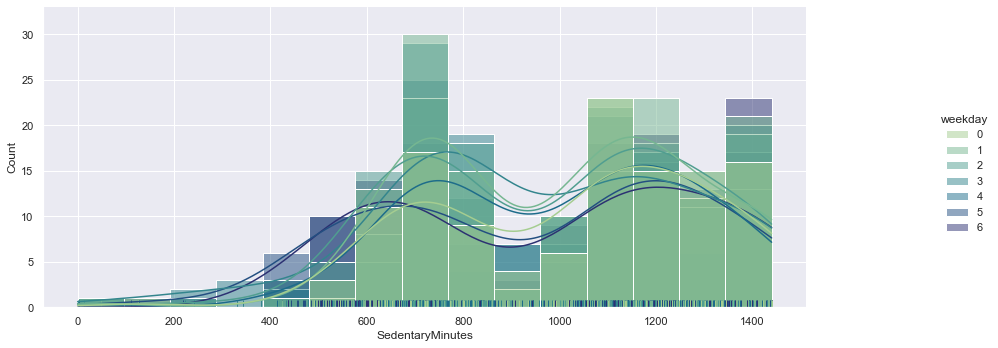

In [814]:
#g =sns.displot(df, x= df.VeryActiveMinutes ,  rug=True ,kde=True , stat='count',palette="crest")
g =sns.displot(df, x= df.SedentaryMinutes  , rug=True ,kde=True , stat='count',palette="crest" , hue='weekday')
g.fig.set_figwidth(15)
g.fig.set_figheight(5)

<AxesSubplot:xlabel='hour', ylabel='Value'>

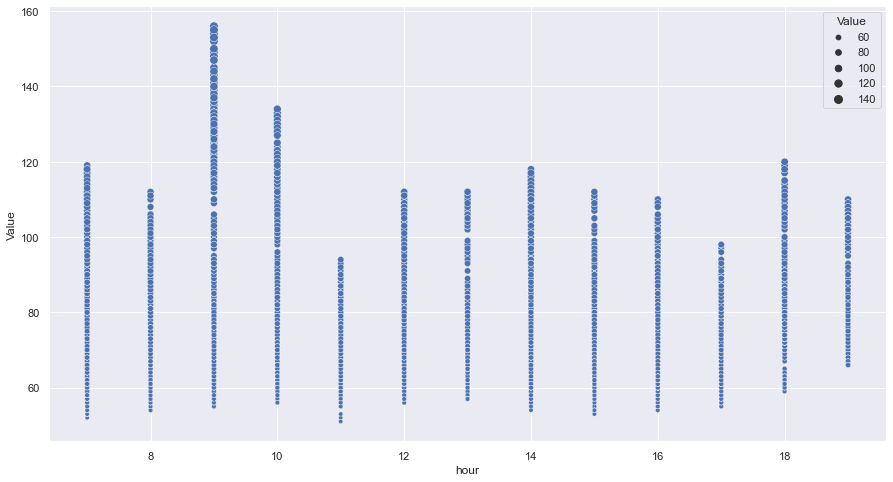

In [636]:
sns.scatterplot(data=df_heart1, y="Value", x="hour" ,size='Value')

# Heart rate Analysis

<AxesSubplot:xlabel='Value', ylabel='minute'>

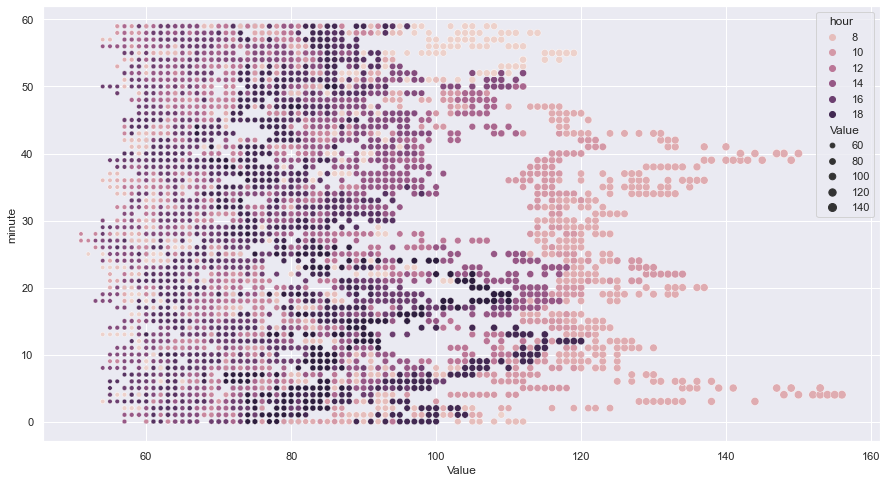

In [625]:
sns.scatterplot(data=df_heart1, x="Value", y="minute" ,hue="hour",size='Value')

<AxesSubplot:xlabel='Value', ylabel='minute'>

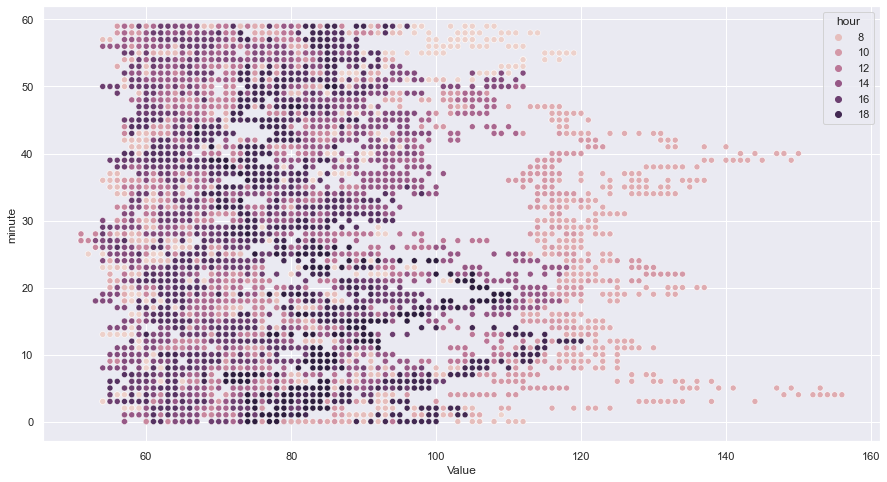

In [616]:
sns.scatterplot(data=df_heart1, x="Value", y="minute" ,hue="hour")

<AxesSubplot:xlabel='hour', ylabel='Value'>

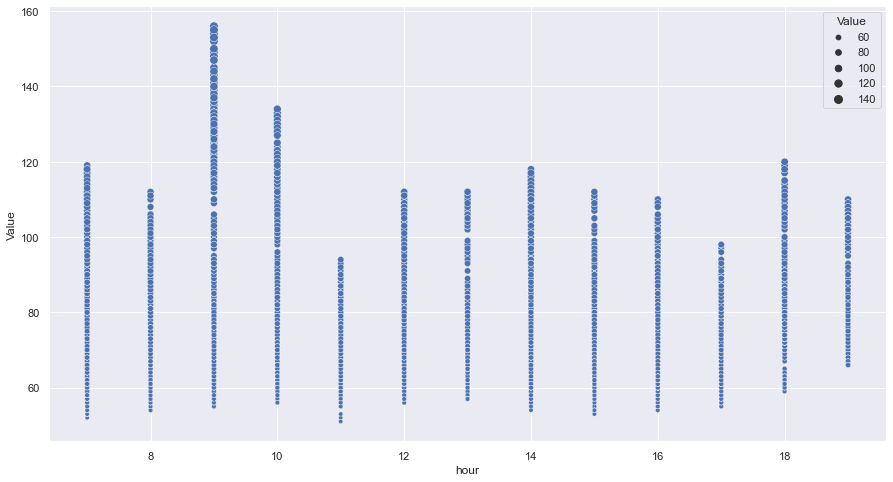

In [626]:
sns.scatterplot(data=df_heart1, y="Value", x="hour",size='Value')
